# Sklearn - Clasificador de Bayes
## Caso de estudio: Experimento de conjunto de datos de flores

<b>Conjunto de datos de flores de 17 categorías</b>:

<p>Se ha creado un conjunto de datos de flores de 17 categorías con 80 imágenes para cada clase. Las flores elegidas son algunas flores comunes en el Reino Unido. Las imágenes tienen variaciones de gran escala, pose y luz y también hay clases con grandes variaciones de imágenes dentro de la clase y una gran similitud con otras clases. Las categorías se pueden ver en la siguiente figura. Dividimos aleatoriamente el conjunto de datos en 3 conjuntos diferentes de entrenamiento, validación y prueba. Se ha etiquetado un subconjunto de las imágenes para la segmentación.</p>

<p>Ver el artículo de referencia y descargar el conjunto de datos: <a href="https://www.robots.ox.ac.uk/~vgg/data/flowers/17/">click aquí</a></p>

<h3>Descarga el conjunto de datos</h3> <p>Aquí hay un experimento simple. Solo descargué 1360 conjuntos de datos (58M de tamaño, 40 de cada uno de los 17 tipos de flores y una lista de nombres de imágenes txt) <a href="https://www.robots.ox.ac.uk/~vgg/data/flowers/17/17flowers.tgz">click aquí</a></p>

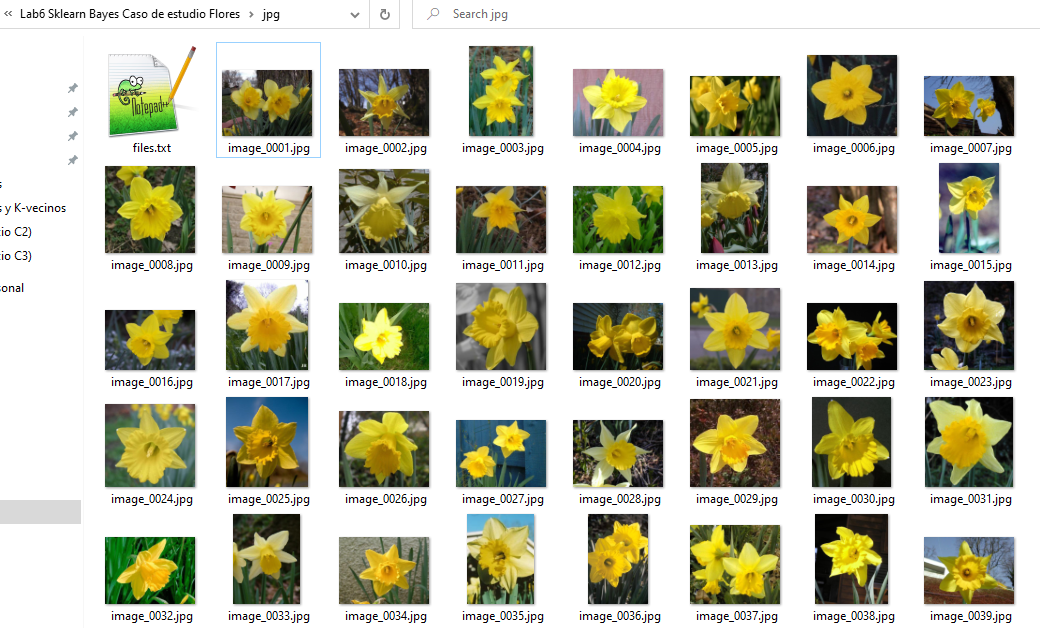

De acuerdo con el par txt, cada 40 hojas se clasifican en diferentes carpetas. A continuación moveremos las imagenes para sus carpetas a partir de dicha clasificación. 

<code>shutil.move()</code> Mover archivos

In [1]:
"""1. Descargue 17 tipos de imágenes de datos de flores, cada 40 imágenes se ordenan en una carpeta
 Enlace de descarga: http://www.robots.ox.ac.uk/~vgg/data/flowers/17/
"""
import os
import shutil

n=0
label=0
with open("jpg/files.txt", "r") as f:
    for line in f.readlines():
        if n < 40:
            n = n + 1
        else:
            label = label + 1
            n = 0
        path = 'jpg/{}'.format(line.replace("\n", ""))
        path2 = 'train/{}/'.format(label) # es lo mismo que decir: 'train/'+str(label)+'/'
        if not os.path.exists(path2):
            os.makedirs(path2)
        shutil.move(path, path2 + line.replace("\n", ""))

<p>Resultado obtenido</p>

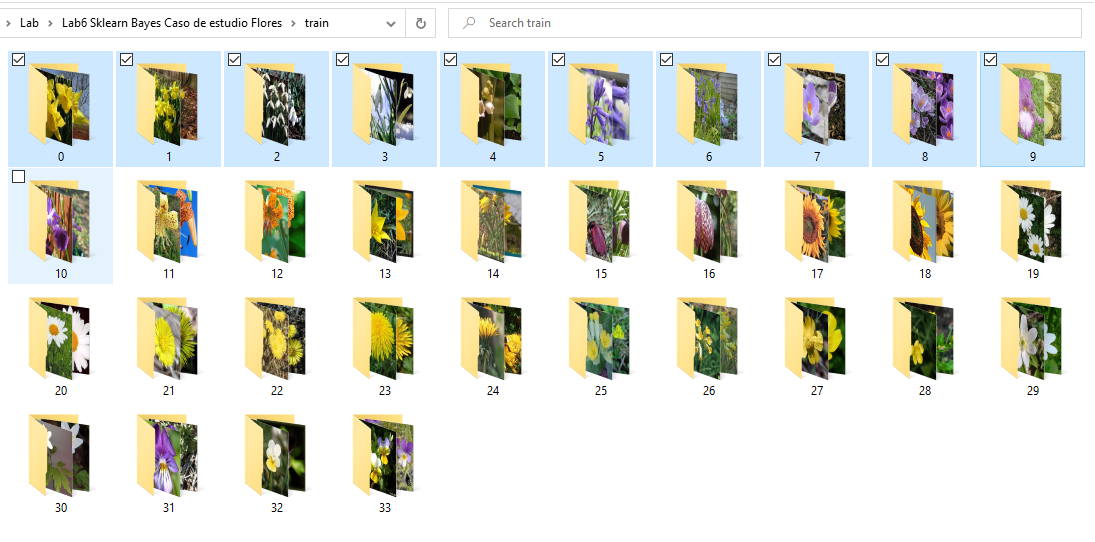

<p>Para este caso elegiremos un conjunto de 10 categorías. El elemento X que se clasifica tiene 10 * 40 = 400 imágenes: (tomamos las 10 principales especies de flores).</p>


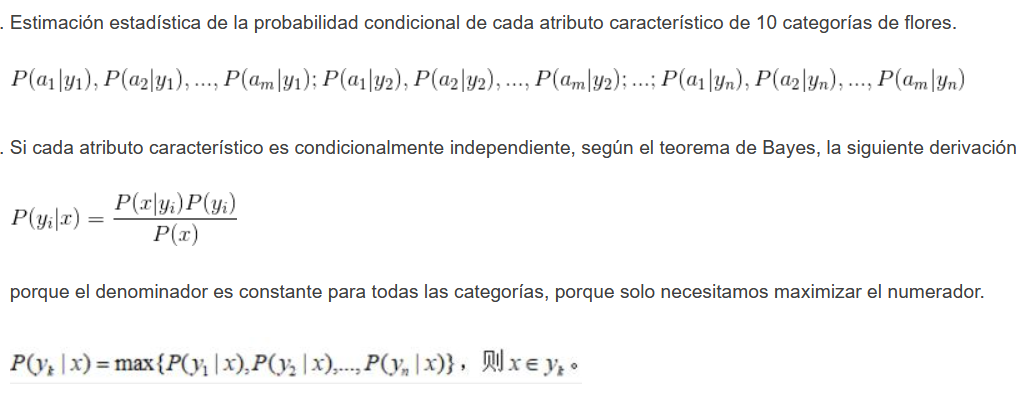

<b>Método ingenuo de Bayes:</b> Es un método de clasificación basado en el teorema de Bayes y el supuesto de independencia de las condiciones características. Es decir, se supone que los atributos son condicionalmente independientes entre sí cuando se da el valor objetivo. Es decir, ninguna variable de atributo tiene una proporción mayor del resultado de la decisión y ninguna variable de atributo tiene una proporción menor del resultado de la decisión.

<b>La clasificación de Naive Bayes se divide en tres etapas</b>
<ul>
    <li>El primer escenario--<code>Etapa de preparación</code> La tarea en esta etapa es hacer los preparativos necesarios para la clasificación de Bayes ingenua. El trabajo principal es determinar los atributos de las características de acuerdo con la situación específica, y dividir adecuadamente cada atributo de las características, y luego clasificar manualmente algunos de los elementos que se clasificarán para formar la capacitación. Coleccion de muestra. La entrada de esta etapa son todos los datos que se van a clasificar y la salida son los atributos de las características y las muestras de entrenamiento. Esta etapa es la única etapa que debe completarse manualmente en toda la clasificación Bayesiana ingenua. Su calidad tendrá un impacto importante en todo el proceso. La calidad del clasificador está determinada en gran medida por los atributos de las características, la división de atributos de las características y la calidad de la muestra de entrenamiento.</li>
    <li>Segunda etapa--<code>Fase de entrenamiento del clasificador</code> La tarea de esta etapa es generar un clasificador, el trabajo principal es calcular la frecuencia de cada categoría en la muestra de entrenamiento y la estimación de probabilidad condicional de cada división de atributo de característica para cada categoría, y registrar los resultados. La entrada son los atributos de características y las muestras de entrenamiento, y la salida es el clasificador. Esta etapa es una etapa mecánica, que el programa puede calcular automáticamente de acuerdo con la fórmula descrita anteriormente.</li>
    <li>La tercera etapa <code>Fase de aplicación</code> La tarea de esta etapa es utilizar el clasificador para clasificar los artículos a clasificar, la entrada es el clasificador y los artículos a clasificar, y la salida es la relación de mapeo entre los artículos a clasificar y la categoría. Esta etapa también es una etapa mecánica y se completa por programa.</li>
</ul>

In [4]:
"""
Clasificación y reconocimiento de Naive Bayes

1. Conjunto de entrenamiento dividido y conjunto de prueba:
    Las 400 imágenes se dividen aleatoriamente en el 70% del conjunto de entrenamiento (286 imágenes) 
     y el 30% del conjunto de prueba (123 imágenes).
     
2. Lectura de imágenes y conversión aHistograma de píxeles
     Aquí está el estándar de extracción de características, aquí usaremos temporalmente la característica de histograma 
     para extraer (obtendremos el histograma de píxeles de cada imagen), simplificar el proceso; 
     en el uso real, el estándar de extracción aquí debería ser su función de extracción de características de 
     optimización personalizada.
    
3. Procesamiento de clasificación de imágenes basado en Naive Bayes 
    Realizaremos la clasificación y el análisis de imágenes de acuerdo con la distribución de características de los píxeles.
"""

# -*- coding: utf-8 -*-
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

#----------------------------------------------------------------------------------
# El primer paso es dividir el conjunto de entrenamiento y el conjunto de prueba
#----------------------------------------------------------------------------------

X = [] # Definir el nombre de la imagen
Y = [] # Definir clasificación de imágenes
#Z = [] # definir píxeles de imagen

for i in range(0, 10):
    # Atravesar carpetas, leer imágenes
    for f in os.listdir("train/%s" % i):
        # Obtener nombre de imagen
        X.append("train/" +str(i) + "/" + str(f))
        # Obtener la etiqueta de categoría de imagen es el nombre de la carpeta
        Y.append(i)

X = np.array(X)
Y = np.array(Y)

# La tasa aleatoria es del 100%, 30% de los cuales se seleccionan como conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.3, random_state=1)

print(len(X_train), len(X_test), len(y_train), len(y_test))

#----------------------------------------------------------------------------------
# Paso 2 Lectura de imágenes y conversión a histograma de píxeles
#----------------------------------------------------------------------------------

#Conjunto de entrenamiento
XX_train = []
for i in X_train:
    # Leer imagen
    # print(i)
    image = cv2.imread(i)
    
    # El tamaño del píxel de la imagen es consistente
    img = cv2.resize(image, (256,256), interpolation=cv2.INTER_CUBIC)

    # Calcular el histograma de la imagen y almacenarlo en la matriz X
    hist = cv2.calcHist([img], [0,1], None, [256,256], [0.0,255.0,0.0,255.0])

    XX_train.append(((hist/255).flatten()))

# Equipo de prueba
XX_test = []
for i in X_test:
    # Leer imagen
    # print(i)
    image = cv2.imread(i)
    
    # El tamaño del píxel de la imagen es consistente
    img = cv2.resize(image, (256,256), interpolation=cv2.INTER_CUBIC)

    #Calcular el histograma de la imagen y almacenarlo en la matriz X
    hist = cv2.calcHist([img], [0,1], None, [256,256], [0.0,255.0,0.0,255.0])

    XX_test.append(((hist/255).flatten()))

#----------------------------------------------------------------------------------
# Tercer paso Procesamiento de clasificación de imágenes basado en Naive Bayes
#----------------------------------------------------------------------------------

from sklearn.naive_bayes import BernoulliNB
# Usa el conjunto de entrenamiento para entrenar al modelo
clf = BernoulliNB().fit(XX_train, y_train) # Clasificador Bernoulli Bayes
predictions_labels = clf.predict(XX_test)

# Utilice el conjunto de pruebas para predecir resultados
print('Resultado del pronóstico:')
print(predictions_labels)

# Generar informe de clasificación basado en texto
print('Evaluación del algoritmo:') # Exactitud de la evaluación de algoritmos (precisión), recuperación (recuperación) y valor F (puntuación F1)
print((classification_report(y_test, predictions_labels)))

# Generar informe de clasificación de tipo de diccionario
report = classification_report(y_test, predictions_labels, output_dict=True)
print('Informe de clasificación de tipo de diccionario de la segunda imagen:')
for key, value in report["1"].items():
    print(f"{key:10s}:{value:10.2f}")
    
# Obtenga las primeras 10 imágenes y los resultados de la predicción
k = 0
while k < 10:
    # Leer imagen
    print(X_test[k])
    image = cv2.imread(X_test[k])
    print(predictions_labels[k])
    
    # Mostrar imagen
    cv2.imshow("img", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    k = k + 1


286 123 286 123
Resultado del pronóstico:
[6 2 6 6 3 4 4 0 3 7 6 2 0 6 8 9 8 7 4 4 0 4 0 2 4 4 7 8 4 4 2 9 1 4 6 6 5
 0 2 7 9 8 4 2 4 6 0 8 7 4 7 7 8 3 5 3 2 7 3 4 8 3 2 0 6 4 0 2 3 4 7 4 6 8
 4 4 6 4 3 3 0 8 7 0 7 9 4 8 1 7 1 6 0 2 6 0 7 4 7 4 3 6 5 7 3 2 3 4 9 9 7
 1 2 6 5 6 6 8 2 4 8 9 2]
Evaluación del algoritmo:
              precision    recall  f1-score   support

           0       0.58      0.64      0.61        11
           1       0.25      0.11      0.15         9
           2       0.43      0.43      0.43        14
           3       0.17      0.33      0.22         6
           4       0.16      0.40      0.23        10
           5       0.00      0.00      0.00        15
           6       0.47      0.62      0.53        13
           7       0.38      0.38      0.38        16
           8       0.25      0.21      0.23        14
           9       0.71      0.33      0.45        15

    accuracy                           0.34       123
   macro avg       0.34      0.

Dos de los primeros diez resultados de predicción son correctos, porque nuestras muestras de entrenamiento son muy pocas y la extracción de características solo depende del histograma como factor de juicio, por lo que la precisión aquí no es alta.

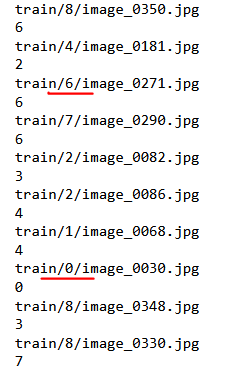

¿Y si queremos guardar/almacenar dicho clasificador? ¿Cómo le haríamos para posteriormente usarlo en futuras predicciones?

In [5]:
# Usaremos esta librería incorporada en sklearn
#from sklearn.externals import joblib
import joblib

# Almacenamos el clasificador en un archivo
filename = 'classifier.joblib.pkl'
_ = joblib.dump(clf, filename, compress=9)

In [6]:
# Leeremos el archivo almacenado
clf2 = joblib.load(filename)
clf2

BernoulliNB()

In [7]:
# Utilizaremos el clasificador almacenado
predictions_labels2 = clf2.predict(XX_test)

# Utilice el conjunto de pruebas para predecir resultados
print('Resultado del pronóstico:')
print(predictions_labels2)

# Generar informe de clasificación basado en texto
print('Evaluación del algoritmo:') # Exactitud de la evaluación de algoritmos (precisión), recuperación (recuperación) y valor F (puntuación F1)
print((classification_report(y_test, predictions_labels2)))

Resultado del pronóstico:
[6 2 6 6 3 4 4 0 3 7 6 2 0 6 8 9 8 7 4 4 0 4 0 2 4 4 7 8 4 4 2 9 1 4 6 6 5
 0 2 7 9 8 4 2 4 6 0 8 7 4 7 7 8 3 5 3 2 7 3 4 8 3 2 0 6 4 0 2 3 4 7 4 6 8
 4 4 6 4 3 3 0 8 7 0 7 9 4 8 1 7 1 6 0 2 6 0 7 4 7 4 3 6 5 7 3 2 3 4 9 9 7
 1 2 6 5 6 6 8 2 4 8 9 2]
Evaluación del algoritmo:
              precision    recall  f1-score   support

           0       0.58      0.64      0.61        11
           1       0.25      0.11      0.15         9
           2       0.43      0.43      0.43        14
           3       0.17      0.33      0.22         6
           4       0.16      0.40      0.23        10
           5       0.00      0.00      0.00        15
           6       0.47      0.62      0.53        13
           7       0.38      0.38      0.38        16
           8       0.25      0.21      0.23        14
           9       0.71      0.33      0.45        15

    accuracy                           0.34       123
   macro avg       0.34      0.34      0.32    

### Actividad

#### 1. Investigue qué significa el parámetro de <code> alpha </code> en el método del clasificador de Bayes utilizado desde la biblioteca de scikit-learn.




`aplha`: Representa el parámetro de suavizado (Laplace/Lidstone) (0 para ningún suavizado). El suavizado de Laplace es una técnica de que ayuda a abordar el problema de probabilidad cero en el algoritmo de Naïve Bayes. Este problema se da cuando una probabilidad basada en la frecuencia es cero, y dado el terema de Bayes esto haría que se borrarán toda la información en las otras probabilidades. La solución para este problema es el Suavizado de Laplace/Lidstone. Básicamente es una técnica para suavizar datos categóricos. Una corrección de muestra pequeña se incorporará en cada estimación de probabilidad. En consecuencia, ninguna probabilidad será cero. esta es una forma de regularizar Naive Bayes, y cuando el pseudo recuento es cero, se denomina suavizado de Laplace. Mientras que en el caso general a menudo se le suavizado de Lidstone. A medida que aumenta alfa, la probabilidad de verosimilitud se mueve hacia la distribución uniforme (0.5). La mayoría de las veces se utiliza alfa = 1 para eliminar el problema de la probabilidad cero. Si elegimos un valor de ¡alfa!=0 (no igual a 0), la probabilidad ya no será cero aunque una palabra no esté presente en el conjunto de datos de entrenamiento.


Fuente: https://medium.com/syncedreview/applying-multinomial-naive-bayes-to-nlp-problems-a-practical-explanation-4f5271768ebf


#### 2. Realice al menos 2 pruebas (2 clasificadores del clasificador de Bayes) moviéndole los parámetros que tiene incorporado el mismo en su implementación (ver la documentación oficial) y obtenga la evaluación de cada uno de los experimientos realizados. Trate de darle una justificación al cambio de dichos parámetros

Referencia: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB

1. Vamos a aliminar el suavizado, por lo que nuestro parámetro de `alpha` será 0, luego el umbral de binarización será el valor default de 0, esto debido a que requerimos que se genere el mapeo, pues nuestros vectores no cuentan con valores booleanos, por lo que la predicción sería mala, en este caso se usará el ajuste a una prior uniforme, por lo que usarémos el valor `False` en el parámetro `fit_prior`.

In [48]:
clf3 = BernoulliNB(alpha=0.0, binarize=0.0, fit_prior=False, class_prior=None).fit(XX_train, y_train) # Clasificador Bernoulli Bayes

/usr/local/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


In [49]:
# Utilizaremos el clasificador almacenado
predictions_labels3 = clf3.predict(XX_test)

# Utilice el conjunto de pruebas para predecir resultados
print('Resultado del pronóstico:')
print(predictions_labels3)

# Generar informe de clasificación basado en texto
print('Evaluación del algoritmo:') # Exactitud de la evaluación de algoritmos (precisión), recuperación (recuperación) y valor F (puntuación F1)
print((classification_report(y_test, predictions_labels3)))

Resultado del pronóstico:
[6 2 6 6 2 4 1 0 3 6 6 9 0 9 8 9 9 9 1 5 0 4 0 4 4 4 7 8 5 0 2 9 1 4 6 6 9
 0 3 7 9 9 4 9 5 6 0 8 8 4 9 8 9 4 5 9 5 9 3 4 8 3 2 0 6 4 0 2 4 4 9 1 6 8
 4 4 6 4 3 3 0 8 7 0 6 9 4 8 1 7 1 6 0 2 6 0 5 4 9 4 4 9 8 7 9 2 9 4 9 9 7
 1 2 6 5 6 6 8 9 4 8 9 2]
Evaluación del algoritmo:
              precision    recall  f1-score   support

           0       0.62      0.73      0.67        11
           1       0.29      0.22      0.25         9
           2       0.56      0.36      0.43        14
           3       0.33      0.33      0.33         6
           4       0.27      0.60      0.37        10
           5       0.29      0.13      0.18        15
           6       0.41      0.54      0.47        13
           7       0.50      0.19      0.27        16
           8       0.17      0.14      0.15        14
           9       0.25      0.40      0.31        15

    accuracy                           0.35       123
   macro avg       0.37      0.36      0.34    

En este caso notemos que obtenermos un error por la probabilidad 0, y que los indicadores mejoran ligeranete  sin la corrección. El ajuste de la rpior  auna uniforme no afecta demasiado el resultado, aumo que se debe a que nuestra prior caluclada debe de seguir una distribución similar.

2. En segundo lugar, vamos a tomar el valor de `alpha` en 0.5, vamos a reducir la ventana de binarización a 0.1, dado que no tenemos valores binarios será de esperarse predicciones muy malas, y la prior será ajustada:

In [52]:
clf4 = BernoulliNB(alpha=0.5, binarize=0.1, fit_prior=True, class_prior=None).fit(XX_train, y_train) # Clasificador Bernoulli Bayes

In [53]:
# Utilizaremos el clasificador almacenado
predictions_labels4 = clf4.predict(XX_test)

# Utilice el conjunto de pruebas para predecir resultados
print('Resultado del pronóstico:')
print(predictions_labels4)

# Generar informe de clasificación basado en texto
print('Evaluación del algoritmo:') # Exactitud de la evaluación de algoritmos (precisión), recuperación (recuperación) y valor F (puntuación F1)
print((classification_report(y_test, predictions_labels4)))

Resultado del pronóstico:
[3 1 3 3 3 3 1 1 3 3 3 3 0 3 3 3 3 3 3 3 1 4 3 6 3 3 3 3 4 4 1 3 3 3 3 6 3
 0 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 1 3 3 3 6 3 1 3 3 3 3 4 3 3 3 3 3 3 3
 3 3 5 4 3 3 0 3 3 1 3 3 4 3 3 4 1 4 4 3 3 0 3 4 3 4 3 3 3 3 3 4 3 4 3 3 3
 1 3 3 1 3 3 3 3 3 7 3 1]
Evaluación del algoritmo:
              precision    recall  f1-score   support

           0       0.60      0.27      0.37        11
           1       0.25      0.33      0.29         9
           2       0.00      0.00      0.00        14
           3       0.05      0.67      0.09         6
           4       0.31      0.40      0.35        10
           5       0.00      0.00      0.00        15
           6       0.00      0.00      0.00        13
           7       0.00      0.00      0.00        16
           8       0.00      0.00      0.00        14
           9       0.00      0.00      0.00        15

    accuracy                           0.11       123
   macro avg       0.12      0.17      0.11    

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
